In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\pc\Downloads\high_value_customers.csv",encoding = "ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
#Removing null values
df = df[pd.notnull(df["CustomerID"])]

In [9]:
#excluding negative values in quantity and unit price
df = df[(df.Quantity>0) & (df.UnitPrice>0)]

In [10]:
#returned item indicated with c so we can drop them
df = df[~df["StockCode"].str.contains("C")]

In [11]:
df  = df.drop_duplicates()

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df.shape
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


<AxesSubplot:>

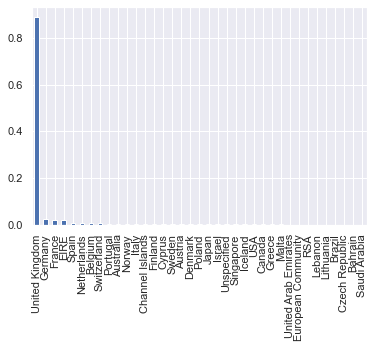

In [14]:
df.Country.value_counts(normalize=True).plot(kind="bar")

In [15]:
df = df[df.Country == "United Kingdom"]

In [16]:
print("orders from {} to {}".format(df["InvoiceDate"].min(),df["InvoiceDate"].max()))

orders from 1-Apr-17 to 9-Sep-17


In [17]:
df["Total Revenue"] = df["Quantity"]*df["UnitPrice"]
Monetory = df.groupby("CustomerID")["Total Revenue"].sum()
Monetory = Monetory.reset_index()
Monetory.head()

,CustomerID,Total Revenue
0,12346.0,77183.60
1,12747.0,4128.71
2,12748.0,32509.54
3,12749.0,4014.18
4,12820.0,942.34


In [18]:
Frequency = df.groupby("CustomerID")["InvoiceNo"].count()
Frequency = Frequency.reset_index()
Frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,100
2,12748.0,4345
3,12749.0,196
4,12820.0,59


In [19]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceYearMonth"] = df["InvoiceDate"].map(lambda date: 100*date.year + date.month)
df["Date"] = df["InvoiceDate"].dt.strftime("%Y-%m")
df["diff"] = max(df["InvoiceDate"])-df["InvoiceDate"]
Recency = df.groupby("CustomerID")["diff"].min()

Recency = Recency.reset_index()
Recency.head()

,CustomerID,diff
0,12346.0,325 days
1,12747.0,2 days
2,12748.0,0 days
3,12749.0,3 days
4,12820.0,3 days


In [20]:
Recency["diff"] = Recency["diff"].dt.days
Recency.head()

,CustomerID,diff
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [21]:
rfs = pd.merge(Recency , Frequency , on= "CustomerID",how = "inner")

In [23]:
rfs = pd.merge(rfs,Monetory,on="CustomerID",how="inner")

In [26]:
rfs.columns = ["CustomerID","Recency","Frequency","Monetory"]

In [27]:
rfs

,CustomerID,Recency,Frequency,Monetory
0,12346.0,325,1,77183.60
1,12747.0,2,100,4128.71
2,12748.0,0,4345,32509.54
3,12749.0,3,196,4014.18
4,12820.0,3,59,942.34
...,...,...,...,...
3910,18280.0,277,10,180.60
3911,18281.0,180,7,80.82
3912,18282.0,7,12,178.05
3913,18283.0,3,720,2041.78


In [28]:
rfs["R"] = pd.qcut(rfs["Recency"],5,labels=[5,4,3,2,1])
rfs["F"] = pd.qcut(rfs["Frequency"],5,labels=[1,2,3,4,5])
rfs["M"] = pd.qcut(rfs["Monetory"],5,labels=[1,2,3,4,5])
rfs["RFM_Score"] = rfs["R"].astype(str)+rfs["F"].astype(str)+rfs["M"].astype(str)

In [29]:
rfs

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12747.0,2,100,4128.71,5,4,5,545
2,12748.0,0,4345,32509.54,5,5,5,555
3,12749.0,3,196,4014.18,5,5,5,555
4,12820.0,3,59,942.34,5,4,4,544
...,...,...,...,...,...,...,...,...
3910,18280.0,277,10,180.60,1,1,1,111
3911,18281.0,180,7,80.82,1,1,1,111
3912,18282.0,7,12,178.05,5,1,1,511
3913,18283.0,3,720,2041.78,5,5,5,555


In [30]:
seg_map = {
    r"[1-2][1-2]": "Hibernating",
    r"[1-2][3-4]": "At Risk",
    r"[1-2]5": "Can't Loose",
    r"3[1-2]": "About to Sleep",
    r"33": "Need Attention",
    r"[3-4][4-5]":"Loyal Customer",
    r"41": "Promising",
    r"51": "New Customer",
    r"[4-5][2-3]": "Potential Loyalist",
    r"5[4-5]": "Champions"
}

In [31]:
rfs["Segment"] = rfs["R"].astype(str) + rfs["F"].astype(str)
rfs["Segment"] = rfs["Segment"].replace(seg_map,regex=True)
rfs.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_Score,Segment
0,12346.0,325,1,77183.60,1,1,5,115,Hibernating
1,12747.0,2,100,4128.71,5,4,5,545,Champions
2,12748.0,0,4345,32509.54,5,5,5,555,Champions
3,12749.0,3,196,4014.18,5,5,5,555,Champions
4,12820.0,3,59,942.34,5,4,4,544,Champions


In [32]:
rfs.groupby("Segment").mean().sort_values("Monetory")

,CustomerID,Recency,Frequency,Monetory
Segment,,,,
About to Sleep,15525.787671,52.219178,15.267123,435.219486
Promising,15496.234694,22.428571,7.183673,445.777347
Hibernating,15529.887500,207.501042,12.985417,537.732126
Need Attention,15809.184615,51.410256,40.523077,815.458821
Potential Loyalist,15534.200000,15.753846,33.876923,879.101826
At Risk,15573.109615,167.796154,55.523077,884.872462
Can't Loose,15891.676056,145.901408,180.098592,2268.055930
Loyal Customer,15597.416321,33.410788,152.181189,2428.635339
New Customer,15577.375000,6.145833,7.062500,4111.827083


In [33]:
file_name = "rfm_df1.xlsx"
rfs.to_excel(file_name)
print("DataFrame is written to excel file successfully")

DataFrame is written to excel file successfully
